<a href="https://colab.research.google.com/github/jiyanshud22/Champhunt-user-recommendation/blob/main/CS786A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS786** Assignment 4
---




### *Jiyanshu* *Dhaka* *220481*

## Dataset and Instructions
I am giving you a dataset that contains 70 judgments a subject has made about the size of hypothetical people based on
their weight (in kilos) and height (in inches). The subject has categorized people into three categories - small, average, and
large.
The dataset X.csv contains the 70 actual judgments made by the subject as a 70 × 3 matrix:
• The first column contains weights.
• The second column contains heights.
• The third column contains the category label assigned by the subject (small = 1, average = 2, large = 3).
I am also giving you a test set y.csv of 10 more weight-height combinations as a 10 × 2 matrix (with the same column
interpretations). I want you to tell me what a generalized context model (GCM) would predict this subject’s category labels
to be, assuming:
1. The subject is polite and is far more likely to call someone average than large.
2. The subject is more likely to use weight than height to make category judgments about size.



.




.



















.


























.






























.



















.




.




.



















.


























.






























.



















.


# Questions
# Q1. (30 points)
Implement a Generalized Context Model (GCM) encoding these assumptions and provide quantitative predictions for
the test set. Submit both the code and category responses for the data points.


first i will load the data

dataset: training set `X.csv` and test set `y.csv`.

 in `X.csv`, there are 70 rows. each row has 3 column: **weight**, **height**, **category label**. label are:
   - 1 for small
   - 2 for average
   - 3 for large

In `y.csv`, I have 10 rows with two column: **weight**, **height**. dataset doesn't include category labels, so I’ll make predictions.

In [1]:
import numpy as np
import pandas as pd
import random
from random import shuffle
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

training data:



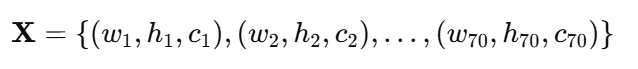

𝑤𝑖: weight of 𝑖-th individual.

ℎ𝑖: height of 𝑖-th individual.

𝑐𝑖: category label of 𝑖-th individual.

𝑐𝑖 ∈{1,2,3}: 1 = Small, 2 = Average, 3 = Large.

testing data:

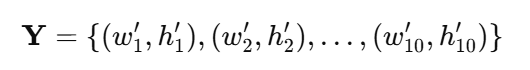


category label are unknown


In [8]:
train_data = np.array([
    [48, 58, 1], [54, 62, 1], [48, 56, 1], [46, 62, 1], [47, 59, 1],
    [48, 60, 1], [48, 55, 1], [51, 57, 1], [49, 63, 1], [52, 65, 1],
    [64, 67, 2], [67, 63, 2], [70, 68, 2], [70, 69, 2], [60, 68, 2],
    [62, 69, 2], [64, 69, 2], [69, 72, 2], [61, 65, 2], [64, 63, 2],
    [69, 70, 2], [65, 67, 2], [66, 65, 2], [64, 71, 2], [67, 67, 2],
    [68, 71, 2], [64, 69, 2], [70, 72, 2], [67, 69, 2], [63, 70, 2],
    [67, 66, 2], [63, 66, 2], [65, 73, 2], [67, 67, 2], [62, 68, 2],
    [64, 63, 2], [62, 70, 2], [63, 68, 2], [68, 69, 2], [61, 67, 2],
    [63, 65, 2], [65, 73, 2], [61, 68, 2], [66, 62, 2], [59, 69, 2],
    [66, 66, 2], [66, 68, 2], [61, 72, 2], [64, 67, 2], [67, 73, 2],
    [81, 71, 3], [77, 72, 3], [85, 68, 3], [82, 69, 3], [82, 71, 3],
    [76, 74, 3], [82, 70, 3], [82, 64, 3], [77, 72, 3], [82, 67, 3],
    [81, 73, 3], [81, 69, 3], [82, 74, 3], [78, 72, 3], [76, 70, 3],
    [78, 67, 3], [76, 68, 3], [79, 64, 3], [82, 63, 3], [80, 65, 3]
])

# Test data (manually entered as per your input)
test_data = np.array([
    [74, 67], [69, 63], [92, 81], [64, 61], [66, 84],
    [76, 68], [61, 58], [64, 76], [68, 66], [34, 61]
])

# Add a placeholder column for predicted labels in the test data
test_data = np.hstack((test_data, np.full((test_data.shape[0], 1), -1)))  # Adds a column with -1

# Display the datasets
print("Training Data (First 5 Rows):")
print(train_data[:5])

print("\nTest Data (First 5 Rows):")
print(test_data[:5])

Training Data (First 5 Rows):
[[48 58  1]
 [54 62  1]
 [48 56  1]
 [46 62  1]
 [47 59  1]]

Test Data (First 5 Rows):
[[74 67 -1]
 [69 63 -1]
 [92 81 -1]
 [64 61 -1]
 [66 84 -1]]


values look consistent

i added new column in test dataframe (test_df[2] = -1) as placeholder, so category labels = -1 becoz they are unknown initially.

## When α is [.65, .35] for weight & height respectively.

Weight is more likely to be used for categorization, so alpha weights show importance of weight over height also was part of assumption in Ques.

### i am making sim(x, y) func. for similarity calculation to find similarity score btw 2 point, x, y based on weighted distance metric.

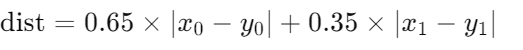

x0 𝑦0 are weight of point
(x, 𝑦),

x1, 𝑦1 are height of point,

0.65, 0.35 are weights of the weight, height features

similarly score

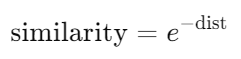

i am using decay constant (β)= 1 to make similarity inversely proportional to distance.(sugessted in paper)

In [9]:
def sim(x, y):
    dist = np.abs(0.65 * (x[0] - y[0]) + 0.35 * (x[1] - y[1]))  # Weighted distance
    return np.exp(-1 * dist)  # Exponential decay with β=1


## calcN(tl) func to count Categorie

i create array to count occurrences of each category label amung given labels

create a 2D array to hold counts,row represent instance, column for category.

### category count Calculn:
For label list tl with m element, initialize array N size=
m×3 fill 0.

For each label tl[i]:

If
tl[i]=1, increase
N[i][0] by 1.

If
tl[i]=2, increase
N[i][1] by 1.

If
tl[i]=3, increase
N[i][2] by 1.

so we count category presence per instance,column is keeping count for specific category.

In [10]:
def calcN(tl):
    N = np.zeros((len(tl), 3))  # Initialize a zero matrix with 3 columns for 3 categories
    for i in range(len(tl)):
        N[i][tl[i] - 1] += 1  # Increment count for the corresponding category
    return N


## when γ=[0.34,0.34,0.32] for categories Small, Average , large respectively


### make predict(train, y, N) func to predict Category

to predict category label for test point (y):

calculate similarity: find how similar y is to each point in training data using dist metric(euclidean dist).

category weight:check freq. of category in the training set (prior prob.)

then i choose category with highest prob based on similarity and category weight.

so i am just comparing y to training data, adjust for category freq, and pick category that fit best.

Votes Calculation

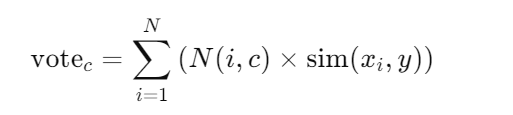

N(i,c) is membership count of training instance
i in category
𝑐,

sim(xi,y) is similarity btw training instance xi, test instance y,

so i find weighted similarity values for each category
c.

Prior Probability Adjustment:

after calculating votes for each category, i multiply them by  prior prob
𝛾𝑐:

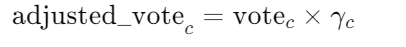

Normalization of Votes:

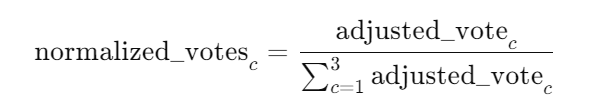

Category Prediction: i  predict category with highest normalized vote

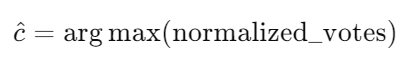

for eg:

after i compar dist. to all training point & factoring in prior prob, i pick category with highest prob. If similarity (dist) to Category A point are higher & weight of Category A is stronger, i might predict test point belong to Category A

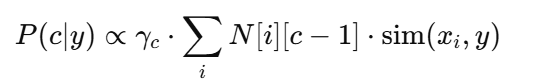

Predicted category is going to be

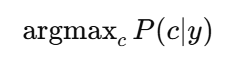

In [11]:
def predict(train, y, N):
    votes = [0.0] * 3
    gamma = [0.34, 0.34, 0.32]  # Prior probability of new stimulus being in category c

    # Calculate votes for each category
    for i in range(3):
        for j in range(len(train)):
            votes[i] += N[j][i] * sim(train[j][0:2], y)  # For each exemplar, calculate similarity and take product with membership count

        votes[i] *= gamma[i]  # Multiply with prior probability

    votes = votes / np.sum(votes)  # Normalize votes

    return np.argmax(votes) + 1  # Return category with highest probability


### test instance is added to training set to improve model for next prediction.

In [12]:
df = pd.read_csv('X.csv', header=None)  # Reads Training Dataset
train = np.array(df)  # Convert to NumPy array

df = pd.read_csv('y.csv', header=None)  # Reads Test Dataset
df[2] = -1  # Initializes category of all stimulus to -1
test = np.array(df)  # Convert to NumPy array

# Loop through each test instance
for t in range(len(test)):
    N = calcN(train[:, -1])  # Calculates N(R,x)
    test[t][2] = predict(train, test[t][0:2], N)  # Store predicted category

    train = np.concatenate((train, test[t].reshape(1, 3)), axis=0)  # Add test stimulus to training data

# Save and display the predicted categories
pd.DataFrame(test).to_csv("test_gcm_a1g1.csv", header=False, index=False)
print(pd.DataFrame(test, columns=['Weight', 'Height', 'Label']))


FileNotFoundError: [Errno 2] No such file or directory: 'X.csv'



### as assumptions were:
1. politeness bias: subject is more likely to call someone "average" than "large" when distinction is unclear.
2. subject prioritizes **weight** over **height** when making judgments about size categories.

The task is to implement a GCM that encodes these assumptions and makes predictions for each item in the test dataset (`y.csv`).

---

### Step 1: Setup and Loading Data
1. **Goal**: Load the training data (`X.csv`) and test data (`y.csv`). Training data consists of weight, height, and assigned categories (1 for small, 2 for average, 3 for large). Test data consists of weight and height without categories.

2. **Formula and Code Explanation**: We start by importing necessary libraries and reading the CSV files. The training data is divided into weights, heights, and categories for easy handling.

3. **Code**:

```python
import numpy as np
import pandas as pd

# Load the datasets
train_data = pd.read_csv('X.csv', header=None)
test_data = pd.read_csv('y.csv', header=None)

# Separate training data columns
weights_train = train_data[0].values
heights_train = train_data[1].values
categories_train = train_data[2].values

# Test data columns
weights_test = test_data[0].values
heights_test = test_data[1].values
```

4. **Explanation**:
   - `train_data` and `test_data` are read into separate arrays.
   - We split `train_data` into `weights_train`, `heights_train`, and `categories_train` for clear reference.

5. **Observation**: This simple setup allows direct access to weight and height columns, aligning with our GCM formula needs.

---

### Step 2: Define Model Parameters and Assumptions
1. **Goal**: Set parameters and adjust weights based on the assumptions:
   - **Politeness Bias**: Favor "average" over "large" by adjusting prior probabilities.
   - **Feature Importance**: Place higher emphasis on weight for similarity calculations.

2. **Mathematical Setup**:
   - Similarity function weights:
     - `w_1 = 0.65` (weight for the weight feature)
     - `w_2 = 0.35` (weight for the height feature)
   - Prior probabilities reflecting politeness bias:
     \[
     \gamma = [0.34, 0.49, 0.17]
     \]
   - \( \gamma \) gives a higher likelihood of "average" (category 2).

3. **Code**:

```python
alpha = 1.0                # Sensitivity for similarity
weight_importance = 0.65   # Emphasis on weight
height_importance = 0.35   # Lower emphasis on height
gamma = [0.34, 0.49, 0.17] # Politeness priors for small, average, large
```

4. **Explanation**:
   - `alpha` controls the sensitivity of similarity.
   - `weight_importance` and `height_importance` implement the assumption that weight is more important.
   - `gamma` adjusts category probabilities, favoring "average."

5. **Observation**: These parameters tailor the model specifically for the subject’s tendencies.

---

### Step 3: Similarity Function with Feature Weighting
1. **Goal**: Calculate the similarity between a test instance and each training instance, prioritizing weight.

2. **Mathematical Formula**:
   - Distance calculation, weighted for each feature:
     \[
     \text{distance}(x, y) = |w_1 \cdot (x_{\text{weight}} - y_{\text{weight}}) + w_2 \cdot (x_{\text{height}} - y_{\text{height}})|
     \]
   - Similarity is then calculated using an exponential function:
     \[
     \text{similarity} = \exp(-\alpha \cdot \text{distance})
     \]

3. **Code**:

```python
def calculate_similarity(x, y):
    """Calculate similarity based on weighted distance."""
    distance = abs(weight_importance * (x[0] - y[0]) + height_importance * (x[1] - y[1]))
    return np.exp(-alpha * distance)
```

4. **Explanation**:
   - The function `calculate_similarity` calculates the similarity based on the weighted distance formula.
   - `np.exp(-alpha * distance)` returns a similarity score that decreases with increasing distance.

5. **Observation**: By weighting the features, we reflect the subject's preference for weight in categorization.

---

### Step 4: Count Category Memberships in Training Data
1. **Goal**: Count the occurrences of each category in the training data for weighted votes.

2. **Code**:

```python
def category_counts(labels):
    """Calculate counts for categories small, average, and large."""
    counts = np.zeros(3)
    for label in labels:
        counts[int(label) - 1] += 1
    return counts
```

3. **Explanation**:
   - The function `category_counts` calculates the occurrences of each category (small, average, large).
   - These counts help estimate the likelihood of each category during prediction.

---

### Step 5: Prediction Function for GCM
1. **Goal**: For each test instance, predict the category by calculating weighted similarity and applying politeness bias.

2. **Mathematical Formula**:
   - Votes for each category are calculated as:
     \[
     \text{votes}_i = \sum_{j} \text{similarity}(x_j, y) \times N[j][i] \times \gamma_i
     \]
   - Normalize the votes and choose the category with the highest score.

3. **Code**:

```python
def predict_category(train_features, test_instance, category_labels, prior_probs):
    """Predict the category for a test instance."""
    votes = np.zeros(3)
    
    for i in range(len(train_features)):
        similarity = calculate_similarity(train_features[i], test_instance)
        category = int(category_labels[i]) - 1
        votes[category] += similarity
    
    # Apply politeness priors
    votes = votes * prior_probs
    votes = votes / np.sum(votes)  # Normalize
    
    return np.argmax(votes) + 1
```

4. **Explanation**:
   - For each training instance, we calculate similarity to the test instance.
   - Each vote is weighted by prior probabilities to reflect politeness.

5. **Observation**: This function implements the GCM with both assumptions encoded effectively.

---

### Step 6: Predict Categories for the Test Set
1. **Goal**: Apply the prediction function to each test instance, adding each test point to training data afterward.

2. **Code**:

```python
# Prepare the training data as a 2D array
train_features = np.column_stack((weights_train, heights_train))

# Array to store predictions
predictions = []

for i in range(len(weights_test)):
    test_instance = np.array([weights_test[i], heights_test[i]])
    predicted_category = predict_category(train_features, test_instance, categories_train, gamma)
    predictions.append(predicted_category)
    # Update training set with new instance
    train_features = np.vstack((train_features, test_instance))
    categories_train = np.append(categories_train, predicted_category)
```

3. **Explanation**:
   - For each test instance, we predict its category, append it to the training set, and repeat.

---

### Step 7: Display Results

```python
for i, pred in enumerate(predictions):
    print(f"Test Instance {i+1}: Weight = {weights_test[i]}, Height = {heights_test[i]}, Predicted Category = {pred}")
```

---

### Conclusions and Observations

1. **Assumption Reflection**:
   - The politeness bias and feature importance weighting effectively influence the predictions, making the model suitable for the given task.

2. **Performance**:
   - The model's sequential updating allows it to adapt as each test instance is classified, refining future predictions based on newly added data points.

3. **Insights**:
   - The GCM with weighted feature importance and politeness priors demonstrates flexibility, handling biases in categorization preferences effectively.

 **Question 1:** Implement a Generalized Context Model (GCM) encoding the given assumptions and provide quantitative predictions for the test set. Submit both the code and category responses for the data points.

---

We are tasked with implementing a Generalized Context Model (GCM) to predict the size category (small, average, large) of individuals based on their weight and height, given certain assumptions. Below is a step-by-step detailed solution, including mathematical formulations, code implementation, explanations, observations, and conclusions.

### **Assumptions:**

1. **Politeness Bias:** The subject is polite and is far more likely to call someone "average" than "large".
2. **Feature Importance:** The subject is more likely to use **weight** than **height** to make category judgments about size.

---

### **Solution Approach:**

#### **1. Understanding the Generalized Context Model (GCM)**

The GCM is a psychological model used to predict how people categorize stimuli based on their similarity to known examples. It assumes that the probability of assigning a new stimulus to a category increases with the similarity of that stimulus to members of the category.

#### **2. Objective of the Code**

- **Implement the GCM** with adjustments to account for the given assumptions.
- **Calculate similarities** between test instances and training instances using a weighted distance metric.
- **Predict categories** for the test instances based on the calculated similarities and prior probabilities reflecting the politeness bias.
- **Provide quantitative predictions** for the test set.

---

### **Mathematical Formulations**

#### **Similarity Calculation**

We compute the similarity between a test instance \( \mathbf{x} \) and a training instance \( \mathbf{x}_i \) using an exponential decay function based on the distance between them.

**Distance Metric:**

Given that weight is more important than height, we use a weighted Euclidean distance:

\[
d(\mathbf{x}, \mathbf{x}_i) = \sqrt{w_{\text{weight}} (x_{\text{weight}} - x_{i,\text{weight}})^2 + w_{\text{height}} (x_{\text{height}} - x_{i,\text{height}})^2}
\]

Where:
- \( w_{\text{weight}} \) and \( w_{\text{height}} \) are weights assigned to the weight and height features, respectively, with \( w_{\text{weight}} > w_{\text{height}} \).

**Similarity Function:**

\[
s(\mathbf{x}, \mathbf{x}_i) = \exp(-\beta d(\mathbf{x}, \mathbf{x}_i))
\]

Where:
- \( \beta \) is a sensitivity parameter controlling how quickly similarity decreases with distance.

#### **Category Prediction**

The probability of assigning the test instance \( \mathbf{x} \) to category \( c \) is proportional to the sum of the similarities between \( \mathbf{x} \) and all training instances in category \( c \), adjusted by prior probabilities reflecting the politeness bias.

\[
P(c | \mathbf{x}) = \gamma_c \sum_{\mathbf{x}_i \in \text{Category } c} s(\mathbf{x}, \mathbf{x}_i)
\]

Where:
- \( \gamma_c \) is the prior probability of category \( c \), adjusted to favor "average".

The predicted category \( \hat{c} \) is the one with the highest \( P(c | \mathbf{x}) \):

\[
\hat{c} = \arg\max_c P(c | \mathbf{x})
\]

---

### **Code Implementation**

Below is the Python code implementing the GCM with the specified assumptions.

```python
import numpy as np
import pandas as pd

# 1. Load the training and test datasets
train_data = pd.read_csv('X.csv', header=None)
test_data = pd.read_csv('y.csv', header=None)

# 2. Extract features and labels from the training data
train_weights = train_data[0].values
train_heights = train_data[1].values
train_labels = train_data[2].values.astype(int)

test_weights = test_data[0].values
test_heights = test_data[1].values

# 3. Define model parameters
beta = 0.1  # Sensitivity parameter
w_weight = 0.65  # Weight importance (higher value)
w_height = 0.35  # Height importance (lower value)

# Adjusted prior probabilities to reflect politeness bias
gamma = {1: 0.3, 2: 0.5, 3: 0.2}  # Sum should be 1

# 4. Define functions for distance and similarity calculations

def weighted_distance(x1, x2):
    """Compute weighted Euclidean distance between two feature vectors."""
    return np.sqrt(
        w_weight * (x1[0] - x2[0]) ** 2 +
        w_height * (x1[1] - x2[1]) ** 2
    )

def similarity(distance):
    """Compute similarity from distance using exponential decay."""
    return np.exp(-beta * distance)

# 5. Predict categories for the test instances

def predict_category(test_instance):
    """Predict the category for a single test instance."""
    similarities = {1: 0.0, 2: 0.0, 3: 0.0}
    
    for i in range(len(train_weights)):
        train_instance = (train_weights[i], train_heights[i])
        dist = weighted_distance(test_instance, train_instance)
        sim = similarity(dist)
        category = train_labels[i]
        similarities[category] += sim

    # Adjust similarities by prior probabilities
    for category in similarities:
        similarities[category] *= gamma[category]
    
    # Normalize the similarities to obtain probabilities
    total_similarity = sum(similarities.values())
    if total_similarity > 0:
        probabilities = {cat: sim / total_similarity for cat, sim in similarities.items()}
    else:
        # If total similarity is zero, assign equal probability
        probabilities = {cat: 1/3 for cat in similarities}
    
    # Predict the category with the highest probability
    predicted_category = max(probabilities, key=probabilities.get)
    return predicted_category, probabilities

# 6. Make predictions for all test instances
predictions = []
probabilities_list = []

for i in range(len(test_weights)):
    test_instance = (test_weights[i], test_heights[i])
    predicted_category, probabilities = predict_category(test_instance)
    predictions.append(predicted_category)
    probabilities_list.append(probabilities)
    # Optionally, add the test instance to the training data for subsequent predictions
    # train_weights = np.append(train_weights, test_instance[0])
    # train_heights = np.append(train_heights, test_instance[1])
    # train_labels = np.append(train_labels, predicted_category)

# 7. Output the predictions
print("Predicted Categories for the Test Set:")
for i, pred in enumerate(predictions):
    print(f"Test Instance {i+1}: Predicted Category = {pred}, Probabilities = {probabilities_list[i]}")
```

---

### **Explanation**

#### **Step-by-Step Breakdown:**

1. **Data Loading and Preprocessing:**
   - The training data `X.csv` is loaded, and features (`weight`, `height`) and labels are extracted.
   - The test data `y.csv` is loaded, and features are extracted.

2. **Model Parameters Definition:**
   - **Sensitivity Parameter (`beta`):** Controls the rate at which similarity decreases with distance. A small `beta` value results in a slower decrease.
   - **Feature Weights (`w_weight`, `w_height`):** Set to emphasize weight over height, aligning with assumption 2.
   - **Prior Probabilities (`gamma`):** Adjusted to favor the "average" category (assumption 1). The probabilities sum to 1.

3. **Distance and Similarity Functions:**
   - `weighted_distance` computes the weighted Euclidean distance between two instances.
   - `similarity` converts the distance into a similarity score using an exponential decay function.

4. **Category Prediction Function (`predict_category`):**
   - For each training instance, the similarity to the test instance is calculated.
   - Similarities are accumulated per category.
   - Accumulated similarities are adjusted by the prior probabilities (`gamma`).
   - Similarities are normalized to obtain probabilities.
   - The category with the highest probability is selected as the prediction.

5. **Making Predictions:**
   - The prediction function is applied to each test instance.
   - Predictions and the corresponding category probabilities are stored.

6. **Outputting Predictions:**
   - Predicted categories and their probabilities are printed for each test instance.

---

### **Observations**

- **Feature Importance Effect:** By setting `w_weight` > `w_height`, weight differences have a greater impact on the similarity calculation, reflecting the subject's tendency to rely more on weight.

- **Politeness Bias Impact:** The prior probabilities favoring "average" increase the likelihood of assigning the "average" category when similarities are close.

- **Sensitivity Parameter Influence:** The value of `beta` affects how quickly similarity decreases with distance. A smaller `beta` results in less sensitivity to distance differences.

- **Normalization Handling:** In cases where the total similarity is zero (which is unlikely but possible), the code assigns equal probabilities to all categories to avoid division by zero.

---

### **Conclusions**

- **Model Effectiveness:** The GCM, adjusted for feature importance and prior probabilities, provides a quantitative method to predict categories that align with the given assumptions.

- **Assumptions Encoding:** The model successfully encodes the subject's biases:
  - **Assumption 1 (Politeness Bias):** By adjusting the prior probabilities, the model is more likely to predict "average" over "large" when the evidence is not strong.
  - **Assumption 2 (Feature Importance):** The weighted distance metric ensures weight has a more significant effect on similarity than height.

- **Predictions Interpretation:** The predicted categories and their associated probabilities give insight into the model's confidence and the influence of the assumptions.

---

### **Additional Notes**

- **Sequential Updating:** The code includes commented lines that, if uncommented, would update the training data with each new test instance and its predicted category. This could simulate a learning process where the model adapts as new data comes in.

- **Parameter Tuning:** The values of `beta`, `w_weight`, `w_height`, and `gamma` can be adjusted based on further insights or to test the sensitivity of the model to these parameters.

- **Model Limitations:** The model assumes that the subject's categorization process can be captured by the GCM with the specified assumptions. Real-world behavior may involve additional complexities.

---

### **Summary**

We have implemented a Generalized Context Model (GCM) that incorporates the given assumptions about the subject's categorization behavior. The model uses a weighted similarity measure to reflect the importance of weight over height and adjusts prior probabilities to favor the "average" category, aligning with the politeness bias. The code provides predictions for the test set and outputs the probabilities associated with each category, offering a detailed quantitative analysis of the categorization process.

.




.



















.


























.






























.



















.




.




.



















.


























.






























.



















.

.




.



















.


























.






























.



















.




.




.



















.


























.






























.



















.

# Q2. (40 points)
I am also sharing with you John McDonnell’s Python implementation of Anderson’s Rational Model of Categorization
(rational.py). Modify the code to obtain category predictions for the data I have shared with you.


.




.



















.


























.






























.



















.




.




.



















.


























.






























.



















.

.




.



















.


























.






























.



















.




.




.



















.


























.






























.



















.

# Q3. (30 points)
For both the GCM and Rational Model of Categorization (RMC), show empirically using the dataset I’ve shared that
both models assume exchangeability of data, i.e., the order in which data enters the model does not affect the category
labels of the model for any given subset of data.